- TENSORFLOW RECURSIVE MULTISTEP IMPLEMENTATION: https://stackoverflow.com/questions/69906416/forecast-future-values-with-lstm-in-python/69912334#69912334
- STACK DIFFERENT LSTM LAYERS: https://wandb.ai/lavanyashukla/visualize-models/reports/How-to-stack-multiple-LSTMs-in-keras---VmlldzoxOTg2MTY#:~:text=The%20solution%20is%20to%20add,with%20time%20stamps%20(3D).
- RECURSIVE MULTISTEP FORECASTING SKLEARN: https://skforecast.org/0.11.0/introduction-forecasting/introduction-forecasting#recursive-multi-step-forecasting

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats

pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# download the data
df = yf.download(tickers=['AAPL'], period='2y')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-28,163.059998,165.419998,162.429993,165.119995,163.254379,95056600
2022-03-01,164.699997,166.600006,161.970001,163.199997,161.356064,83474400
2022-03-02,164.389999,167.360001,162.949997,166.559998,164.678116,79724800
2022-03-03,168.470001,168.910004,165.550003,166.229996,164.351837,76678400
2022-03-04,164.490005,165.550003,162.100006,163.169998,161.326416,83737200
...,...,...,...,...,...,...
2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52292200
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45074500
2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400


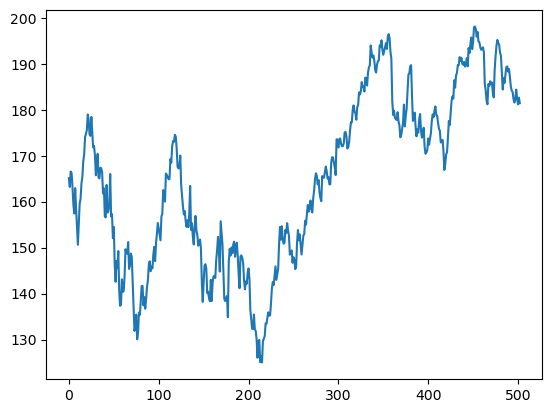

In [3]:
plt.plot(y)
plt.show()

In [4]:
split_index = 250

train_data = y[:split_index]
test_data = y[split_index:]
len(train_data), len(test_data)

(250, 253)

In [6]:
# scale the data
#IS IT OKAY TO TRANSFORM TEST DATASETSET WITH SCALER FITTED ON TRAIN DATA
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(train_data)
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

This cel below needs to be adjusted:
- Use a sliding window of X days * 24 hours, make a forecast for the next 24 hours, then slide the window one day further and add that day into the window to then again make a day ahead forecast 

In [13]:
# generate the input and output sequences for training data
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

X_train = []
Y_train = []

# This loop is designed to ensure that we can extract enough input-output pairs from the time series data
for i in range(n_lookback, len(train_data_scaled) - n_forecast + 1):
    X_train.append(train_data_scaled[i - n_lookback: i]) #This line appends a subsequence of length n_lookback from the y dataset. This represents the input sequence for the forecasting model.
    Y_train.append(train_data_scaled[i: i + n_forecast]) #This represents the corresponding output sequence that the model will be trained to predict.

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [25]:
X_train.shape, Y_train.shape

((161, 60, 1), (161, 30, 1))

In [16]:
# generate the input sequences for test data
X_test = []

for i in range(n_lookback, len(test_data_scaled)):
    X_test.append(test_data_scaled[i - n_lookback: i])

X_test = np.array(X_test)

In [24]:
X_test.shape

(193, 60, 1)

In [17]:
# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=10)



Epoch 1/100

Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch

Line1: This line extracts the last n_lookback data points from the original time series y. It uses negative indexing to specify that we want the last n_lookback elements. These data points will be used as the input sequence for generating forecasts.


Line 2: After extracting the last n_lookback data points, this line reshapes the data to conform to the input shape expected by the model.
- The first argument of reshape, 1, indicates that we want to keep the number of samples as 1. This is because we are generating forecasts for a single input sequence.
- The second argument, n_lookback, specifies the length of the input sequence.
- The third argument, 1, indicates that there is only one feature in each data point. This is common when dealing with univariate time series data.

In [35]:
X_test.shape

(193, 60, 1)

In [34]:
# generate the forecasts
Y_pred_scaled = model.predict(X_test)

7/7 [==============================] - 0s 9ms/step


.reshape(-1, 1): After making predictions, the result is reshaped. The -1 argument in the reshape function indicates that NumPy should automatically calculate the size of one dimension based on the size of the other dimensions and the total number of elements. This is often used when you want to reshape an array while preserving the total number of elements.

The second argument, 1, specifies that we want the reshaped array to have one column. This is typically done to ensure that the resulting array is a column vector, which is common when dealing with forecasts or predictions in a time series context.

In [94]:
np.expand_dims(scaler.inverse_transform(Y_pred_scaled), axis=2).shape

(193, 30, 1)

In [27]:
# Inverse scaling
Y_pred = scaler.inverse_transform(Y_pred_scaled.reshape(-1, 1)) #reshape to get column vector!
Y_actual = test_data[n_lookback:].flatten()

In [51]:
Y_pred.shape, Y_actual.shape

((5790, 1), (193, 1))

In [48]:
Y_actual[:30].shape, Y_pred[:30].shape

((30, 1), (30, 1))

In [135]:
help_list = [i for i in range(30)]

for i in range(1,193):
    help_list += [j for j in range(i,30+i)]

df2 = pd.DataFrame(data={"Predictions": list(Y_pred.flatten()), "Help":help_list})
testdf = df2.groupby("Help").mean()
testdf

,Predictions
Help,
0,166.123184
1,165.695953
2,165.778824
3,165.083832
4,164.734390
...,...
217,150.936295
218,150.281906
219,150.136383


In [76]:
Y_actual[164:194].shape

(29, 1)

In [85]:
from sklearn.metrics import mean_absolute_error as mae

mae(Y_actual[:30].flatten(), Y_pred[:30].flatten())

mae_trend = []
for i in range(1,Y_actual.shape[0]-28):
    if i == 1:
        mae_trend.append(mae(Y_actual[0:30],Y_pred[0:30*i]))
        continue
    current_actual = Y_actual[i-1:30+(i-1)]
    current_predicted = Y_pred[30*(i-1):30*i]
    mae_trend.append(mae(current_actual,current_predicted))
    # print(Y_actual[i-1:30+(i-1)].shape, Y_pred[30*(i-1):30*i].shape)

In [97]:
len(df.index[split_index:-30])

223

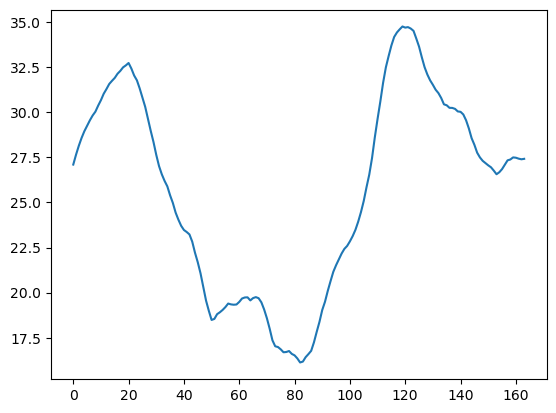

In [86]:
plt.plot(mae_trend)
plt.show()

In [99]:
# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title='AAPL')

NameError: name 'Y_' is not defined